In [6]:
from time import time

import numpy as np
from tensorflow import keras

num_classes = 10
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
test_y = keras.utils.to_categorical(test_y, num_classes)
train_y = keras.utils.to_categorical(train_y, num_classes)

train_x = np.transpose(train_x, (0, 3, 1, 2))
test_x = np.transpose(test_x, (0, 3, 1, 2))
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255
test_x = test_x[0:5000:, ]
test_y = test_y[0:5000:, ]

In [7]:
from torch.nn import Sequential
from torch import nn, optim
from learning.pytorchExt import PytorchExt
batch_size = 32
epoch = 25

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = Sequential(
            nn.Conv2d(3, 32, kernel_size=(3, 3), padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.Conv2d(32, 32, (3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            nn.Conv2d(32, 64, (3, 3), padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(64, 64, (3, 3)),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            nn.Flatten(),
            nn.Linear(2304, 512, bias=True),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        return self.model(x)


model = Model()
model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.01)

pye = PytorchExt(batch_size, epoch, model, loss_func=loss_func, optimizer=optimizer, checkpoint=100)
pye.generateDataFromNumpy(train_x, train_y, test_x, test_y)
start = time()
pyh = pye.iterTrain(CUDA=True)
end = time()
print(f"pytorch use time:{(end - start) / 60} minutes")
print(f"pytorch  accuracy: {pyh['test_accuracy'][-1]}")


 epoch 0--step 1562: loss 1.503742,acc= 50.000000%
epoch 0: train_loss: 1.926749, test_loss: 1.546471, train_acc=32.177705%, test_acc=45.099998%
 epoch 1--step 1562: loss 0.845716,acc= 81.250000%
epoch 1: train_loss: 1.381254, test_loss: 1.180973, train_acc=50.991684%, test_acc=58.759998%
 epoch 2--step 1562: loss 1.722085,acc= 37.500000%
epoch 2: train_loss: 1.207216, test_loss: 1.173344, train_acc=57.827497%, test_acc=58.959995%
 epoch 3--step 1562: loss 1.100039,acc= 68.750000%
epoch 3: train_loss: 1.079865, test_loss: 0.961400, train_acc=62.120122%, test_acc=66.539993%
 epoch 4--step 1562: loss 0.661393,acc= 75.000000%
epoch 4: train_loss: 1.029538, test_loss: 0.931538, train_acc=64.203453%, test_acc=67.299995%
 epoch 5--step 1562: loss 1.329360,acc= 62.500000%
epoch 5: train_loss: 0.903896, test_loss: 0.864717, train_acc=68.757999%, test_acc=70.000000%
 epoch 6--step 1562: loss 0.534966,acc= 75.000000%
epoch 6: train_loss: 0.840942, test_loss: 0.841349, train_acc=71.013278%, test_

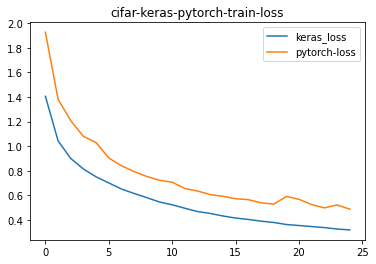

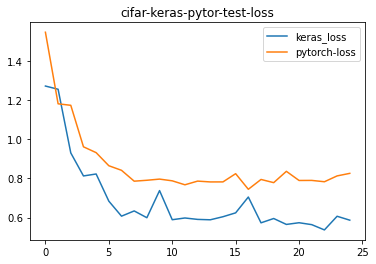

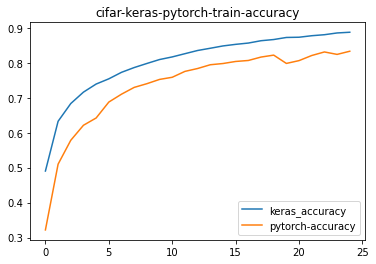

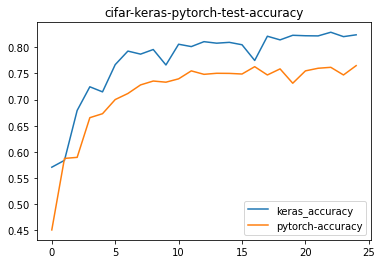

In [8]:
keras_history = np.load("../data/cifar-keras-reslut.npz")
pye.pltshow("cifar-keras-pytorch-train-loss", keras_history['train_loss'], pyh['train_loss'], "keras_loss",
            'pytorch-loss')
pye.pltshow("cifar-keras-pytor-test-loss", keras_history['test_loss'], pyh['test_loss'], "keras_loss", 'pytorch-loss')
pye.pltshow("cifar-keras-pytorch-train-accuracy", keras_history['train_accuracy'], pyh['train_accuracy'],
            "keras_accuracy", 'pytorch-accuracy')
pye.pltshow("cifar-keras-pytorch-test-accuracy", keras_history['test_accuracy'], pyh['test_accuracy'], "keras_accuracy", 'pytorch-accuracy')